# Instantiating pulses
Let us first create a pulse template.

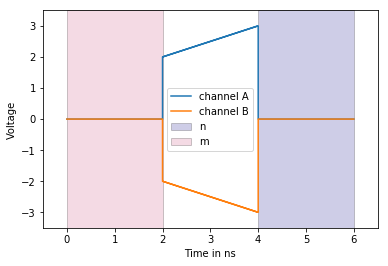

In [1]:
%matplotlib inline
from qctoolkit.pulses.plotting import plot
from qctoolkit.pulses import TablePT
template = TablePT(entries={'A': [(0, 0),
                                  ('ta', 'va', 'hold'),
                                  ('tb', 'vb', 'linear'),
                                  ('tend', 0, 'jump')],
                            'B': [(0, 0),
                                  ('ta', '-va', 'hold'),
                                  ('tb', '-vb', 'linear'),
                                  ('tend', 0, 'jump')]}, measurements=[('m', 0, 'ta'),
                                                                       ('n', 'tb', 'tend-tb')])

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 3,
              'tc': 5,
              'td': 11,
              'tend': 6}
_ = plot(template, parameters, sample_rate=100, show=False, plot_measurements={'m', 'n'})


The `HardwareSetup` class currently expects an instantiated pulse which is currently represented by `Loop` objects. These can be obtained by plugging the desired parameters into the `create_program` method.

In [2]:
program = template.create_program(parameters=parameters,
                                  channel_mapping={'A': 'A', 'B': 'B'})

print(program)
print('Defined on', program[0].waveform.defined_channels)
print(program.get_measurement_windows())

LOOP 1 times:
  ->EXEC <qctoolkit._program.waveforms.MultiChannelWaveform object at 0x000000000BC2EEF0> 1 times
Defined on {'A', 'B'}
{'n': (array([4.]), array([2.])), 'm': (array([0.]), array([2.]))}


The `channel_mapping` keyword argument allows us to rename channels or to drop them by mapping them to `None`. We can do the same to measurements.

In [3]:
program = template.create_program(parameters=parameters,
                                  channel_mapping={'A': None, 'B': 'Y'},
                                  measurement_mapping={'m': 'foo', 'n': None})
print(program)
print('Defined on', program[0].waveform.defined_channels)
print(program.get_measurement_windows())

LOOP 1 times:
  ->EXEC <qctoolkit._program.waveforms.TableWaveform object at 0x000000000BC491D0> 1 times
Defined on {'Y'}
{'foo': (array([0.]), array([2.]))}
